In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DuplicateQuestions/train.csv')

In [ ]:
df.head(5)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.dropna(inplace=True,axis=0)

In [ ]:
df=df.sample(50000,random_state=42)

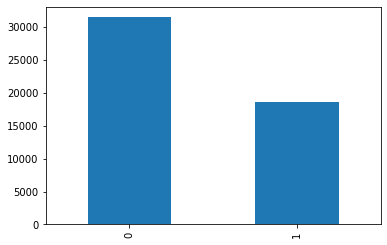

In [ ]:
df['is_duplicate'].value_counts().plot(kind='bar')

**Some Fetaures In Mind**  
1.q1.length,q2.length  
2.q1.words, q2.words  
3.words common  
4.Total words

In [ ]:
df['q1_len']=df['question1'].str.len()
df['q2_len']=df['question2'].str.len()
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63


In [ ]:
df['q1_words']=df['question1'].apply(lambda x : len(x.split(' ')))
df['q2_words']=df['question2'].apply(lambda x : len(x.split(' ')))
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11


In [ ]:
def commonWord(row):
  set1=set(row['question1'].lower().strip().split(' '))
  set2=set(row['question2'].lower().strip().split(' '))
  return len(set1&set2)

In [ ]:
set("How do I play Pokémon GO in Korea?".lower().strip().split(' '))

{'do', 'go', 'how', 'i', 'in', 'korea?', 'play', 'pokémon'}

In [ ]:
df['common_words']=df.apply(commonWord,axis=1)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1


In [ ]:
def totalWord(row):
  set1=set(row['question1'].lower().strip().split(' '))
  set2=set(row['question2'].lower().strip().split(' '))
  return len(set1)+len(set2)

In [ ]:
df['total_words']=df.apply(totalWord,axis=1)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17


In [ ]:
df['word_share']=round(df['common_words']/df['total_words'],2)
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17,0.06


In [ ]:
def plotDist(df,col):
  sns.distplot(df[df['is_duplicate'] == 0][col],label='non duplicate')
  sns.distplot(df[df['is_duplicate'] == 1][col],label='duplicate')
  plt.legend()
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


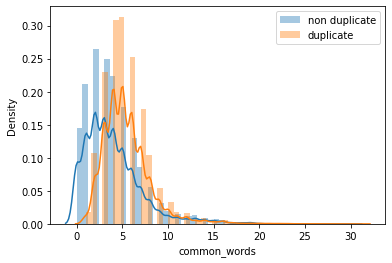

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


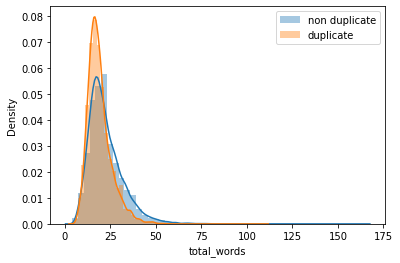

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


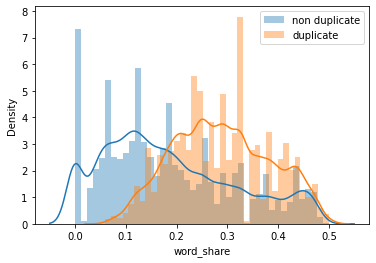

In [ ]:
plotDist(df,'common_words')
plotDist(df,'total_words')
plotDist(df,'word_share')

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17,0.06
252452,252452,336023,366789,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,0,45,118,7,21,2,27,0.07
174039,174039,268330,268331,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,0,48,127,9,20,0,27,0.00
384863,384863,28901,233483,What are some good books on marketing?,What are some of the best books ever written a...,1,38,61,7,11,5,18,0.28


In [ ]:
ques=df.iloc[:,3:5]
ques.head(2)

,question1,question2
8067,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?
224279,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques['question1']) + list(ques['question2'])

cv = CountVectorizer(max_features=1500)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index= ques.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(50000, 3000)

In [ ]:
df1=pd.concat([df.iloc[:,5:],temp_df],axis=1)

In [ ]:
df1.shape

(50000, 3008)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df1.iloc[:,1:].values,df1.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7841

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
fuzzy_features = df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44,88,88,81,90
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17,0.06,28,51,48,55
252452,252452,336023,366789,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,0,45,118,7,21,2,27,0.07,34,56,37,53
174039,174039,268330,268331,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,0,48,127,9,20,0,27,0.00,21,36,32,33
384863,384863,28901,233483,What are some good books on marketing?,What are some of the best books ever written a...,1,38,61,7,11,5,18,0.28,68,61,66,88


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [ ]:
token_features = df.apply(fetch_token_features, axis=1)

df["cwc_min"]       = list(map(lambda x: x[0], token_features))
df["cwc_max"]       = list(map(lambda x: x[1], token_features))
df["csc_min"]       = list(map(lambda x: x[2], token_features))
df["csc_max"]       = list(map(lambda x: x[3], token_features))
df["ctc_min"]       = list(map(lambda x: x[4], token_features))
df["ctc_max"]       = list(map(lambda x: x[5], token_features))
df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
!pip install distance

     |████████████████████████████████| 180 kB 5.4 MB/s 
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16276 sha256=c546af280f211fd8513d0d22522bbfce92fd18dd9aa0e5608d46e453d52ef7df
  Stored in directory: /root/.cache/pip/wheels/b2/10/1b/96fca621a1be378e2fe104cfb0d160bb6cdf3d04a3d35266cc
Successfully built distance


In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44,88,88,81,90,0.833319,0.833319,0.999950,0.999950,0.874989,0.874989,0,1
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17,0.06,28,51,48,55,0.199996,0.142855,0.000000,0.000000,0.142855,0.090908,0,0
252452,252452,336023,366789,Is Kellyanne Conway annoying in your opinion?,Did Kellyanne Conway really imply that we shou...,0,45,118,7,21,2,27,0.07,34,56,37,53,0.399992,0.166665,0.000000,0.000000,0.285710,0.095238,0,0
174039,174039,268330,268331,How do you rate (1-10) and review Maruti Baleno?,What career options does one have after comple...,0,48,127,9,20,0,27,0.00,21,36,32,33,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
384863,384863,28901,233483,What are some good books on marketing?,What are some of the best books ever written a...,1,38,61,7,11,5,18,0.28,68,61,66,88,0.749981,0.499992,0.666644,0.399992,0.714276,0.454541,1,1


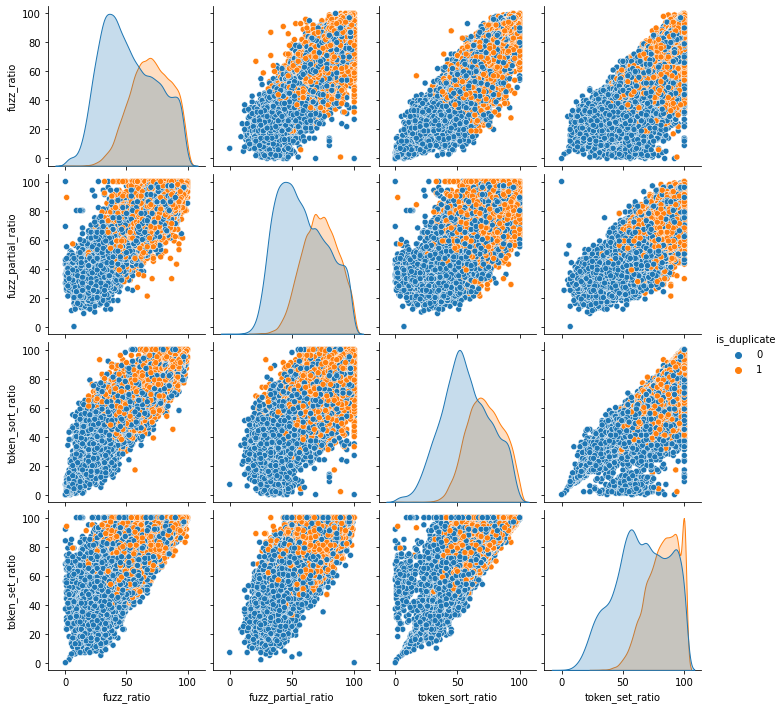

In [ ]:
sns.pairplot(df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
df1.head()

,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
8067,0,34,34,8,8,7,16,0.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
224279,0,40,63,7,11,1,17,0.06,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
252452,0,45,118,7,21,2,27,0.07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
174039,0,48,127,9,20,0,27,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
384863,1,38,61,7,11,5,18,0.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
8067,8067,15738,15739,How do I play Pokémon GO in Korea?,How do I play Pokémon GO in China?,0,34,34,8,8,7,16,0.44,88,88,81,90,0.833319,0.833319,0.99995,0.99995,0.874989,0.874989,0,1
224279,224279,332326,332327,Will a breathing treatment help a cough?,How can I help someone that is unconscious but...,0,40,63,7,11,1,17,0.06,28,51,48,55,0.199996,0.142855,0.00000,0.00000,0.142855,0.090908,0,0


In [ ]:
df2=pd.concat([df.iloc[:,5:],temp_df],axis=1)

In [ ]:
df2.head(2)

,is_duplicate,q1_len,q2_len,q1_words,q2_words,common_words,total_words,word_share,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469,1470,1471,1472,1473,1474,1475,1476,1477,1478,1479,1480,1481,1482,1483,1484,1485,1486,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
8067,0,34,34,8,8,7,16,0.44,88,88,81,90,0.833319,0.833319,0.99995,0.99995,0.874989,0.874989,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
224279,0,40,63,7,11,1,17,0.06,28,51,48,55,0.199996,0.142855,0.00000,0.00000,0.142855,0.090908,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(df2.iloc[:,1:].values,df2.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8041

In [ ]:
import pickle

pickle.dump(rf,open('/content/drive/MyDrive/DuplicateQuestions/model.pkl','wb'))